In [25]:
import numpy as np
import pandas as pd 
import seaborn as sns
import matplotlib
from matplotlib import pyplot as plt
print('Finsihed loading libraries')
#use a small test data
corpus = ['John likes to watch movies. Mary likes movies too.',
         'John also likes to watch football games. Mary hates football.']
print(corpus)
print(len(corpus))
#import the count vectorizer class
from sklearn.feature_extraction.text import CountVectorizer


Finsihed loading libraries
['John likes to watch movies. Mary likes movies too.', 'John also likes to watch football games. Mary hates football.']
2


In [26]:
# instantiate the class
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(corpus)
featureNames = vectorizer.get_feature_names_out()
print(featureNames)
#print the transformed data in matrix form
print(X.toarray())
#functions for pre-processing
import string
import re
import nltk
stopword = nltk.corpus.stopwords.words('english')# All English Stopwords
ps = nltk.PorterStemmer()
def stemming(tokenized_text):
    text = [ps.stem(word) for word in tokenized_text]
    return text
# Function to remove Stopwords
def remove_stopwords(tokenized_list):
    text = [word for word in tokenized_list if word not in stopword]# To remove all stopwords
    return text
def clean_text(text):
    #text = text.replace("</br>", " ")
    text = "".join([word.lower() for word in text if word not in string.punctuation])
    tokens = re.split('\W+', text)
    text = [ps.stem(word) for word in tokens if word not in stopword]
    return text

#try again with pre=processing
count_vect = CountVectorizer(analyzer=clean_text)
X_counts = count_vect.fit_transform(corpus)
print(X_counts.toarray())
featureNames = count_vect.get_feature_names_out()
print(featureNames)
X_counts_df = pd.DataFrame(X_counts.toarray(), columns=count_vect.get_feature_names_out())
X_counts_df.head(10)


['also' 'football' 'games' 'hates' 'john' 'likes' 'mary' 'movies' 'to'
 'too' 'watch']
[[0 0 0 0 1 2 1 2 1 1 1]
 [1 2 1 1 1 1 1 0 1 0 1]]
[[0 0 0 0 1 2 1 2 1]
 [1 2 1 1 1 1 1 0 1]]
['also' 'footbal' 'game' 'hate' 'john' 'like' 'mari' 'movi' 'watch']


,also,footbal,game,hate,john,like,mari,movi,watch
0,0,0,0,0,1,2,1,2,1
1,1,2,1,1,1,1,1,0,1


In [18]:
from sklearn.feature_extraction.text import TfidfVectorizer
#create an object/instance
tf_vectorizer = TfidfVectorizer(analyzer=clean_text)
#get tf -idf values
X_counts = tf_vectorizer.fit_transform(corpus)
featureNames = tf_vectorizer.get_feature_names_out()
print( featureNames )
X_counts_df = pd.DataFrame(X_counts.toarray(), columns=tf_vectorizer.get_feature_names_out())
X_counts_df.head(10)


['also' 'footbal' 'game' 'hate' 'john' 'like' 'mari' 'movi' 'watch']


,also,footbal,game,hate,john,like,mari,movi,watch
0,0.000000,0.000000,0.000000,0.000000,0.259052,0.518105,0.259052,0.728178,0.259052
1,0.332872,0.665744,0.332872,0.332872,0.236841,0.236841,0.236841,0.000000,0.236841


In [19]:
from gensim.models import Word2Vec, KeyedVectors
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from string import punctuation
#preprocess the text.
def preprocess_corpus(texts):
    mystopwords = set(stopwords.words("english"))
    def remove_stops_digits(tokens):
        #Nested function that lowercases, removes stopwords and digits from a list of tokens
        return [token.lower() for token in tokens if token.lower() not in mystopwords and not token.isdigit()
               and token not in punctuation]
    #This return statement below uses the above function to process twitter tokenizer output further. 
    return [remove_stops_digits(word_tokenize(text)) for text in texts]


In [20]:
#tokenize the sentences
sentences = preprocess_corpus(corpus)
print(sentences)
from gensim.models import Word2Vec
model = Word2Vec(sentences=sentences, min_count=1, vector_size=10)

[['john', 'likes', 'watch', 'movies', 'mary', 'likes', 'movies'], ['john', 'also', 'likes', 'watch', 'football', 'games', 'mary', 'hates', 'football']]


# Economy News

In [32]:
import pandas as pd
our_data = pd.read_csv("Full-Economic-News-DFE-839861.txt" , encoding = "ISO-8859-1" )
our_data.shape
# convert label to a numerical variable
our_data = our_data[our_data.relevance != "not sure"] # removing the data where we don't want relevance="not sure".
our_data.shape
our_data['relevance'] = our_data.relevance.map({'yes':1, 'no':0}) # relevant is 1, not-relevant is 0. 
our_data = our_data[["text","relevance"]] # Let us take only the two columns we need.
print(our_data.shape)
print(our_data.head())

from sklearn.feature_extraction import _stop_words
stopwords = _stop_words.ENGLISH_STOP_WORDS
def clean(doc): # doc is a string of text
    doc = doc.replace("</br>", " ") # This text contains a lot of <br/> tags.
    doc = "".join([char for char in doc if char not in string.punctuation and not char.isdigit()])
    doc = " ".join([token for token in doc.split() if token not in stopwords])
    # remove punctuation and numbers
    return doc

(7991, 2)
                                                text  relevance
0  NEW YORK -- Yields on most certificates of dep...          1
1  The Wall Street Journal Online</br></br>The Mo...          0
2  WASHINGTON -- In an effort to achieve banking ...          0
3  The statistics on the enormous costs of employ...          0
4  NEW YORK -- Indecision marked the dollar's ton...          1


# Count-Vectorizer Model

In [33]:
# instantiate the class
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(our_data)
featureNames = vectorizer.get_feature_names_out()
print(featureNames)
#print the transformed data in matrix form
print(X.toarray())
#functions for pre-processing
import string
import re
import nltk
stopword = nltk.corpus.stopwords.words('english')# All English Stopwords
ps = nltk.PorterStemmer()
def stemming(tokenized_text):
    text = [ps.stem(word) for word in tokenized_text]
    return text
# Function to remove Stopwords
def remove_stopwords(tokenized_list):
    text = [word for word in tokenized_list if word not in stopword]# To remove all stopwords
    return text
def clean_text(text):
    #text = text.replace("</br>", " ")
    text = "".join([word.lower() for word in text if word not in string.punctuation])
    tokens = re.split('\W+', text)
    text = [ps.stem(word) for word in tokens if word not in stopword]
    return text

#try again with pre=processing
count_vect = CountVectorizer(analyzer=clean_text)
X_counts = count_vect.fit_transform(our_data)
print(X_counts.toarray())
featureNames = count_vect.get_feature_names_out()
print(featureNames)
X_counts_df = pd.DataFrame(X_counts.toarray(), columns=count_vect.get_feature_names_out())
X_counts_df.head(10)

['relevance' 'text']
[[0 1]
 [1 0]]
[[0 1]
 [1 0]]
['relev' 'text']


,relev,text
0,0,1
1,1,0


## Naive classifier

In [34]:
# import classifiers from sklearn
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
# Step 1: train-test split
x = our_data.text # the column text contains textual data to extract features from
y = our_data.relevance # this is the column we are learning to predict. 
print(x.shape, y.shape)
# split X and y into training and testing sets # random_state=1 for reproducibility
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2,random_state=1)
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)
# Step 2-3: Preprocess and Vectorize train and test data
vect = CountVectorizer(preprocessor=clean) # instantiate a vectoriezer
x_train_dtm = vect.fit_transform(x_train)# use it to extract features from training data
# transform testing data (using training data's features)
x_test_dtm = vect.transform(x_test)
print(x_train_dtm.shape, x_test_dtm.shape)

# Step 3: Train the classifier and predict for test data
nb = MultinomialNB() # instantiate a Multinomial Naive Bayes model
nb.fit(x_train_dtm, y_train) # train the model(timing it with an IPython "magic command")

(7991,) (7991,)
(6392,)
(6392,)
(1599,)
(1599,)
(6392, 51416) (1599, 51416)


MultinomialNB()

## Confusion Matrix & Accuracy

Accuracy:  0.7779862414008756


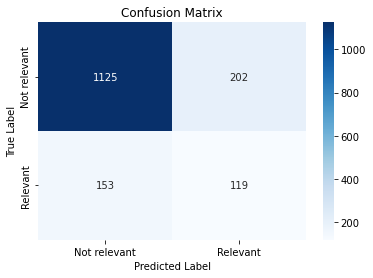

In [35]:
y_pred_class = nb.predict(x_test_dtm)
from sklearn.metrics import accuracy_score
#check the accuracy
# Print accuracy:
print("Accuracy: ", accuracy_score(y_test, y_pred_class))
# Make the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred_class)
class_label = ["Not relevant", "Relevant"]
df_cm = pd.DataFrame(cm, index=class_label,columns=class_label)
sns.heatmap(df_cm, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

# TF_IDF Model

In [36]:
# instantiate the class
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(our_data)
featureNames = vectorizer.get_feature_names_out()
print(featureNames)
#print the transformed data in matrix form
print(X.toarray())
#functions for pre-processing
import string
import re
import nltk
stopword = nltk.corpus.stopwords.words('english')# All English Stopwords
ps = nltk.PorterStemmer()
def stemming(tokenized_text):
    text = [ps.stem(word) for word in tokenized_text]
    return text
# Function to remove Stopwords
def remove_stopwords(tokenized_list):
    text = [word for word in tokenized_list if word not in stopword]# To remove all stopwords
    return text
def clean_text(text):
    #text = text.replace("</br>", " ")
    text = "".join([word.lower() for word in text if word not in string.punctuation])
    tokens = re.split('\W+', text)
    text = [ps.stem(word) for word in tokens if word not in stopword]
    return text

#try again with pre=processing
tf_vectorizer = TfidfVectorizer(analyzer=clean_text)
X_counts = tf_vectorizer.fit_transform(our_data)
print(X_counts.toarray())
featureNames = tf_vectorizer.get_feature_names_out()
print(featureNames)
X_counts_df = pd.DataFrame(X_counts.toarray(), columns=tf_vectorizer.get_feature_names_out())
X_counts_df.head(10)

['relevance' 'text']
[[0. 1.]
 [1. 0.]]
[[0. 1.]
 [1. 0.]]
['relev' 'text']


,relev,text
0,0.0,1.0
1,1.0,0.0


## Naive classifier

In [40]:
# import classifiers from sklearn
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
# Step 1: train-test split
x = our_data.text # the column text contains textual data to extract features from
y = our_data.relevance # this is the column we are learning to predict. 
print(x.shape, y.shape)
# split X and y into training and testing sets # random_state=1 for reproducibility
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2,random_state=1)
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)
# Step 2-3: Preprocess and Vectorize train and test data
vect = TfidfVectorizer(preprocessor=clean) # instantiate a vectoriezer
x_train_dtm = vect.fit_transform(x_train)# use it to extract features from training data
# transform testing data (using training data's features)
x_test_dtm = vect.transform(x_test)
print(x_train_dtm.shape, x_test_dtm.shape)

# Step 3: Train the classifier and predict for test data
nb = MultinomialNB() # instantiate a Multinomial Naive Bayes model
nb.fit(x_train_dtm, y_train) # train the model(timing it with an IPython "magic command")

(7991,) (7991,)
(6392,)
(6392,)
(1599,)
(1599,)
(6392, 51416) (1599, 51416)


MultinomialNB()

## Confusion Matrix & Accuracy

Accuracy:  0.8298936835522202


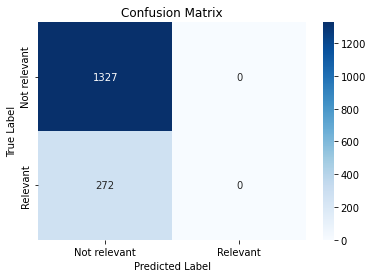

In [44]:
y_pred_class = nb.predict(x_test_dtm)
from sklearn.metrics import accuracy_score
#check the accuracy
# Print accuracy:
print("Accuracy: ", accuracy_score(y_test, y_pred_class))
# Make the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred_class)
class_label = ["Not relevant", "Relevant"]
df_cm = pd.DataFrame(cm, index=class_label,columns=class_label)
sns.heatmap(df_cm, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

# Word-Embedding W2V Model

In [50]:
# instantiate the class
#assign w2v_model to model above it
w2v_model = model
# Creating a feature vector by averaging all embeddings for all sentences
def embedding_feats(list_of_lists):
    DIMENSION = 300
    zero_vector = np.zeros(DIMENSION)
    feats = []
    for tokens in list_of_lists:
        feat_for_this =  np.zeros(DIMENSION)
        count_for_this = 0 + 1e-5 # to avoid divide-by-zero 
        for token in tokens:
            if token in model.wv.key_to_index:
                feat_for_this += model.wv.key_to_index[token]
                count_for_this +=1
        if(count_for_this!=0):
            feats.append(feat_for_this/count_for_this) 
        else:
            feats.append(zero_vector)
    return feats

train_vectors = embedding_feats(our_data.text)
print(len(train_vectors))

7991


## Naive classifier

In [52]:
# import classifiers from sklearn
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
# Step 1: train-test split
x = our_data.text # the column text contains textual data to extract features from
y = our_data.relevance # this is the column we are learning to predict. 
print(x.shape, y.shape)
# split X and y into training and testing sets # random_state=1 for reproducibility
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2,random_state=1)
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)
# Step 2-3: Preprocess and Vectorize train and test data
vect = TfidfVectorizer(preprocessor=clean) # instantiate a vectoriezer
x_train_dtm = vect.fit_transform(x_train)# use it to extract features from training data
# transform testing data (using training data's features)
x_test_dtm = vect.transform(x_test)
print(x_train_dtm.shape, x_test_dtm.shape)

# Step 3: Train the classifier and predict for test data
nb = MultinomialNB() # instantiate a Multinomial Naive Bayes model
nb.fit(x_train_dtm, y_train) # train the model(timing it with an IPython "magic command")

(7991,) (7991,)
(6392,)
(6392,)
(1599,)
(1599,)
(6392, 51416) (1599, 51416)


MultinomialNB()

Accuracy:  0.8298936835522202


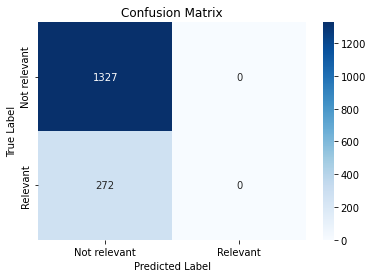

In [53]:
y_pred_class = nb.predict(x_test_dtm)
from sklearn.metrics import accuracy_score
#check the accuracy
# Print accuracy:
print("Accuracy: ", accuracy_score(y_test, y_pred_class))
# Make the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred_class)
class_label = ["Not relevant", "Relevant"]
df_cm = pd.DataFrame(cm, index=class_label,columns=class_label)
sns.heatmap(df_cm, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

In [1]:
#Accuracy:  0.7779862414008756  COUNT-VECT
#Accuracy:  0.8298936835522202 TFIDF
#Accuracy:  0.8298936835522202 W2V